<a href="https://colab.research.google.com/github/KrisSandy/ExMachineLearning/blob/master/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow Neural Network (One Layer NN)

## Implementation of Neural Network


Import required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Initialize Weights

For a Shall Neural Network, there will be a 2 sets of weight matrices and bias vectors, one from input to hidden layer and the other from hidden layer to output.

The weight matrices are initiaised using random function of numpy and to make the weights smaller, 0.01 is multiplied. Bais vectors are initialised with zeros. Python uses broadcasting to expand the bias vectors to match the dimensions of corresponsding weight vectors. 

**Dimensions:**

**W1** : (hidden layer size * input layer size)

**W2** : (output layer size * hidden layer size)

**b1** : (hidden layer size * 1)

**b2** : (output layer size * 1)

In [0]:
def initialise_weights(input_features, hidden_layer_size, output_size = 1):
  W1 = np.random.randn(hidden_layer_size, input_features) * 0.01
  W2 = np.random.randn(output_size, hidden_layer_size) * 0.01
  b1 = np.zeros((hidden_layer_size, 1))
  b2 = np.zeros((output_size, 1))
  return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

### Activation Functions

For this implementation, two types activation functions, sigmoid and tanh are used. 

$sigmoid(z) = \frac{1}{1 + e^{-z}}$

$tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$

In back propogation, gradients of these functions are used in the calculations, and the gradients are calculated as below

Sigmoid: $f'(z) = f(z)(1-f(z))$ 

tanh: $f'(z) = (1-f(z)^2)$


In [0]:
def activation_function(Z, ftype='sigmoid'):
  
  if ftype == 'sigmoid':
    return 1 / (1 + np.exp(-1 * Z))
  elif ftype == 'tanh':
    return np.tanh(Z)
  else:
    raise Exception('Invalid activation function') 

In [0]:
def activation_gradient_function(Z, ftype='sigmoid'):
  
  if ftype == 'sigmoid':
    return Z * (1 - Z)
  elif ftype == 'tanh':
    return (1 - Z**2)
  else:
    raise Exception('Invalid activation gradient function') 

### Feed Forward

In forward propogation, the acivations are calculated by using the input features and weights corresponding to input and hidden layer (W1 and b1). Each layer activations are calculated by calculating the linear function (Z) and applying the activation fuction to the output of the linear function

In the output layer, sigmoid activation function is used as we are implementing a binary classifier

**Activatios of Hidden layer:**

$Z1 = W1.X + b1$

$A1 = g(Z1)$, (sigmoid or tanh activation function can be used here)


$Z2 = W2.X + b2$

$A2 = sigmoid(Z2)$

In [0]:
def feed_forward(X, weights, activation_func):
  Z1 = np.dot(weights['W1'], X) + weights['b1']
  A1 = activation_function(Z1, ftype=activation_func)
  Z2 = np.dot(weights['W2'], A1) + weights['b2']
  A2 = activation_function(Z2, ftype='sigmoid')
  return {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

### Back Propogation

In back propogation, we calculate the gradients of the weights using the activations and derivatives of the activation functions. Back propogation can be implemented using below equations

$dZ^{[2]} = A^{[2]} - Y$

$dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]T}$

$db^{[2]} = \frac{1}{m}\displaystyle\sum_{i=1}^{k}dZ^{[2]}$

$dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{[1]^{'}}(Z^{[1]})$

$dW^{[1]} = \frac{1}{m}dZ^{[1]}X^{T}$

$db^{[1]} = \frac{1}{m}\displaystyle\sum_{i=1}^{k}dZ^{[1]}$



In [0]:
def backpropogation(X, y, weights, activations, activation_func):
  m = X.shape[1]
  dZ2 = activations['A2'] - y
  dW2 = (1/m)*np.dot(dZ2, activations['A1'].T)
  db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.dot(weights['W2'].T, dZ2) * activation_gradient_function(activations['A1'], ftype=activation_func)
  dW1 = (1/m)*np.dot(dZ1, X.T)
  db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
  return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

### Cost Function

Cost of the classifier can be calculated as below

$J = \frac{-1}{m}\displaystyle\sum_{i=1}^{m}(y^{(i)}log(a^{[2](i)}) + (1-y^{(i)})log(1 -a^{[2](i)})$

In [0]:
def compute_cost(y, A2):
  m = y.shape[1]
  cost = (-1/m) * np.sum(np.multiply(y, np.log(A2)) + np.multiply(1 - y, np.log(1 - A2)))
  return cost

### Update Weights

Once the gradients are calculated, below function updates the weights using learning rate and gradients of weights

In [0]:
def update_weights(weights, gradients, learning_rate):
  weights['W1'] = weights['W1'] - learning_rate * gradients['dW1']
  weights['W2'] = weights['W2'] - learning_rate * gradients['dW2']
  weights['b1'] = weights['b1'] - learning_rate * gradients['db1']
  weights['b2'] = weights['b2'] - learning_rate * gradients['db2']
  return weights
  

### Putting everything together

Using the functions created above, a Neural Network with one hidden layer can be created as below



1.   Initialise the weights of the Neural Network using the number of input features, hidden layer size and ouput layer size. As we are implementing a binary classification Neural Network, an output layer of size 1 is used.
2.   Activations of each layer is calculated using the input data and weights. A default activation function of tanh is used to calculate the activations of hidden layer. This can be change to sigmoid if preferred.

3. Cost is computed usin the activations of output layer (`A2`) and the actual output Y.

4. Compute the gradients using back propogation

5. Update the weights using the gradients 

6. Run steps 2-5 multiple times (number of epochs) to train the neural network.





In [0]:
def NNWithOneHiddenLayer(X, Y, hidden_layer_size, activation_func='tanh', num_epochs=100, learning_rate=0.1):
  
  input_features = X.shape[0]
  output_size = Y.shape[0]
  
  weights = initialise_weights(input_features, hidden_layer_size, output_size)
  
  for i in range(num_epochs):
    
    activations = feed_forward(X, weights, activation_func)
    
    cost = compute_cost(Y, activations['A2'])
    if i % 1000 == 0:
      print("Cost after {} iterations is {}".format(i, cost))
    
    gradients = backpropogation(X, Y, weights, activations, activation_func)
    
    weights = update_weights(weights, gradients, learning_rate)
  
  print("Cost after {} iterations is {}".format(i, cost))
  
  return weights


### Predict



Below functions makes the predictions using the feed forward function with test data. A threshold of 0.5 is used to predict the actual output i.e. if the output of the Neural Network is greater than 0.5, a prediction of 1 is made and if the output is less than 0.5, a pediction of 0 is made.

In [0]:
def predict(X, weights, activation_func):
  
  activations = feed_forward(X, weights, activation_func)
  y_predict = activations['A2'] > 0.5
  
  return y_predict.astype(int)

### Score

This function takes in the actual values and predicted values and calculates the accuracy.

In [0]:
def score(y, y_predict):
  return float(np.sum((y[0] == y_predict[0])) / y.shape[1]) * 100

## Planar Dataset (Testing on a simple dataset)

### Prepare Data

Below function takes in X and y and splits the data into training and testing. 

Input to the neural network should be in the dimension of (n, m) where n is the number of features and m is the number of input examples. The output of the neural network should be in the dimension of (1, m). Hence X and y are transformed to bring in this format. 

In [0]:
def prepare_data(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  X_train = X_train.T
  X_test = X_test.T
  y_train = np.reshape(y_train, (1, len(y_train)))
  y_test = np.reshape(y_test, (1, len(y_test)))
  return X_train, X_test, y_train, y_test

Below code reads the input dataset, calls prepare_data function to get training and testing sets

In [0]:
data = pd.read_csv('circles500.csv') 
X = data.drop(columns=['Class']).as_matrix()
y = data['Class'].values
X_train, X_test, y_train, y_test = prepare_data(X, y)

### Train Model

Using the training data (X_train and y_train) call the `NNWithOneHiddenLayer` function with below hyperparameters. 

* Hidden layers = 5

* Hidden Layet Activation function = tanh

* Number of epochs = 15000

* Learning rate = 1

In [0]:
hidden_layer_size = 5
activation_func = 'tanh'

weights = NNWithOneHiddenLayer(X_train, 
                               y_train, 
                               hidden_layer_size, 
                               activation_func=activation_func, 
                               num_epochs=15000, 
                               learning_rate=1)

Cost after 0 iterations is 0.6931453437069706
Cost after 1000 iterations is 0.07282368779579351
Cost after 2000 iterations is 0.03228345899490409
Cost after 3000 iterations is 0.02153652792516739
Cost after 4000 iterations is 0.01591991608814122
Cost after 5000 iterations is 0.012398520083414273
Cost after 6000 iterations is 0.010297151714053265
Cost after 7000 iterations is 0.008975029190911784
Cost after 8000 iterations is 0.00800212106043316
Cost after 9000 iterations is 0.007238545241741698
Cost after 10000 iterations is 0.006619444463605703
Cost after 11000 iterations is 0.006105897097516248
Cost after 12000 iterations is 0.005672227007922444
Cost after 13000 iterations is 0.00530062374338473
Cost after 14000 iterations is 0.004978289580649439
Cost after 14999 iterations is 0.004696035028485185


### Predict

Below code makes the predictions using test dataset and calculates the accuracy

In [0]:
y_predict = predict(X_test, weights, activation_func)
accuracy = score(y_test, y_predict)
print("Accuracy : ", accuracy)

Accuracy :  98.4


### Visualization


Visualize the data points using scatter plot of both test and train datasets. 'x' in the below plot represents a data point from test dataset and 'o' represents a data point from train dataset

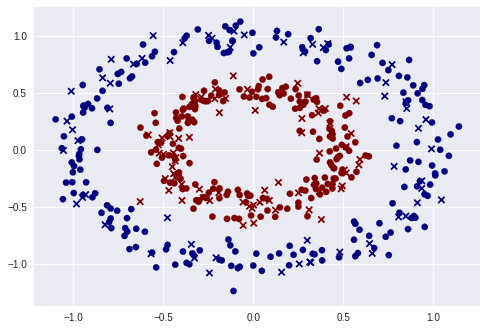

In [0]:
plt.scatter(X_train[0], X_train[1], c=y_train[0], s=40, marker='o', cmap=plt.cm.jet);
plt.scatter(X_test[0], X_test[1], c=y_test[0], s=40, marker='x', cmap=plt.cm.jet);

### Decision Boundary

Below code draws a decision boundary formed by the trained Neural Network. It is drawn by using a meshgrid of points between -1.5 and 1.5 with a spacing of 0.01 between points. These points are sent to the trained Neural Network and the predictions are made. These predictions are plotted using a contour plot. 

Note: 'x' in the below plot represents data points from test dataset and 'o' represents a data points from train dataset

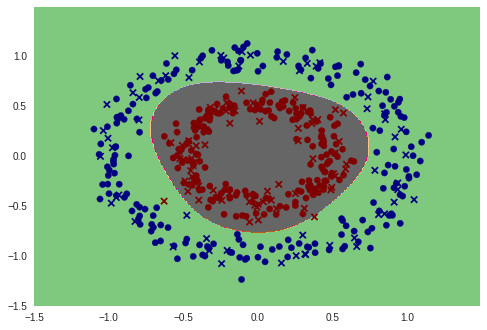

In [0]:
xx1, xx2 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
X_plot = np.c_[xx1.ravel(), xx2.ravel()]
Z = predict(X_plot.T, weights, activation_func)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.Accent)
plt.scatter(X_train[0], X_train[1], c=y_train[0], s=40, marker='o', cmap=plt.cm.jet);
plt.scatter(X_test[0], X_test[1], c=y_test[0], s=40, marker='x', cmap=plt.cm.jet);

## Part 3 - Image Recognition - Cat vs Deer (Testing on a challenging dataset)

### Fetch Dataset 

Get the dataset and untar it

In [0]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar xzf cifar-10-python.tar.gz

--2019-03-04 23:30:16--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.2’

cifar-10-python.tar 100%[===================>] 162.60M   866KB/s    in 2m 37s  

2019-03-04 23:32:53 (1.04 MB/s) - ‘cifar-10-python.tar.gz.2’ saved [170498071/170498071]



### Extract required images (cat and deer)

Below function read the cifaf dataset and extract cat and deer images from the dataset

In [0]:
import pickle

def extract_cifar_batch(file, extract_labels):
  folder = 'cifar-10-batches-py'
  with open(folder + '/' + file, 'rb') as fo:
    batch = pickle.load(fo, encoding='bytes')
  data = batch[b'data']
  labels = batch[b'labels']
  extract_list = list()

  for i in range(len(data)):
    if labels[i] in extract_labels:
      extract_list.append(i)

  data = data[extract_list, :]
  labels = np.array(labels)[extract_list]

  return data, labels

### Convert Image to Grayscale

Below function converts all the input RGB images to Grayscale images. An RGB image can be converted to Grayscale by taking the average of pixel values in each channel and dividing by 255

$P_{grayscale} = \frac{1}{3}(\frac{P_{R}}{255} + \frac{P_{G}}{255} + \frac{P_{B}}{255}) \quad \textit{where p is the pixel value}$

In [0]:
def convert_to_grayscale(X):
  X = X/255
  m, p = X.shape
  X_gray = np.empty((m, int(p/3)))
  for i in range(m):
    picture = X[i]
    picture.shape = (3,32,32)
    r, g, b = picture[0,:,:], picture[0,:,:], picture[0,:,:] 
    gray = (r + g + b)/3
    X_gray[i] = np.ravel(gray)
  return X_gray

### Data Preprocessing

In CIFAR dataset, the labels for the images are numbered from 0 to 9. Cat and Deer images are labelled as 3 and 4 respectively. Below code dows the following



*   Extract Cat and Deer images from the CIFAR data_batch_2 dataset.
*   Convert the images to gray scale.
* Convert the label values from 3 and 4 to 0 and 4 by subtracting 3 from the labels.
* Extract only first 500 images in speed up the training from the extracted images
* Split into Training and Testing and prepare the data (transform the dimensions) using `prepare_data` function created above. 



In [0]:
extract_labels_cifar = [3, 4]
labels_dict = {0: 'cat', 1: 'deer'}
batch_name = 'data_batch_2'

# Extract the cat and deer images from cifar batch 
X,y = extract_cifar_batch(batch_name, extract_labels_cifar)

# Convert the images to gray scale
X_gray = convert_to_grayscale(X)

# Convert the labels to 0/1
y = y-3 

# select subset of 500 images to speed up the training
idx = range(500)
X_gray = X_gray[idx, :]
y = y[idx]

X_train, X_test, y_train, y_test = prepare_data(X_gray, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1024, 375)
(1024, 125)
(1, 375)
(1, 125)


### Visualise Image

This function takes in a picture (RBG or gray scale) and displays the image. Input image is identified as RGB by checking the length of the image which should be equal to 32 (height) * 32 (width) * 3 (channels). For grayscale image the dimension will be 32 (height) * 32 (width)

In [0]:
def visualise(picture):

# Depending whether the image is RBG or grayscale, 
# change the dimensions
  if len(picture) == 3*32*32:
    picture.shape = (3,32,32)
    # Plot.imshow requires the RGB to be the third dimension, 
    # not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
  elif len(picture) == 32*32:
    picture.shape = (32,32)
  else:
    raise(Exception("Unknown dimension"))
    
  plt.imshow(picture)
  plt.show()

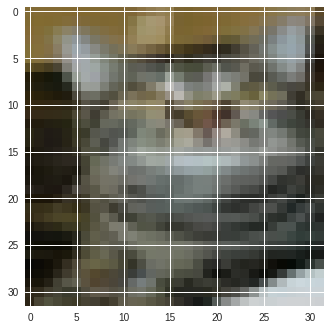

Image 200 : Class is  cat


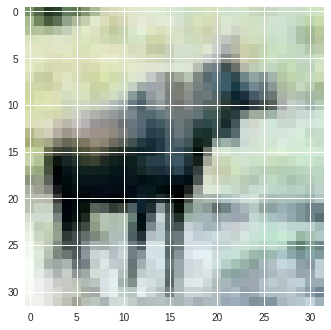

Image 201 : Class is  deer


In [0]:
# Display a few images from the batch
for i in range (200,202):
  visualise(X[i])
  print("Image", i,": Class is ", labels_dict[y[i]])

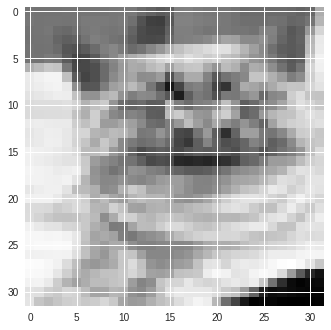

Image 200 : Class is  cat


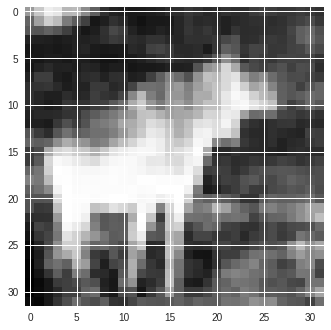

Image 201 : Class is  deer


In [0]:
# Display a few images in grayscale
for i in range (200,202):
  visualise(X_gray[i])
  print("Image", i,": Class is ", labels_dict[y[i]])

### Train Neural Network

Using the datasets created above, a Shallow Neural Network is trained to predict the image class (cat or deer). 

**Parameters used:**



*   Hidden Layer Size = 100
*   Activation Function = tanh
* learning rate = 0.05
* number of epochs = 15000



In [0]:
hidden_layer_size = 100
activation_func = 'tanh'

# Training the images takes approx. 5 min

weights = NNWithOneHiddenLayer(X_train, 
                               y_train, 
                               hidden_layer_size, 
                               activation_func=activation_func, 
                               num_epochs=15000, 
                               learning_rate=0.05)

Cost after 0 iterations is 0.6934478918228827
Cost after 1000 iterations is 0.5053007670476255
Cost after 2000 iterations is 0.3287524664986922
Cost after 3000 iterations is 0.1767136445672583
Cost after 4000 iterations is 0.04811639421733227
Cost after 5000 iterations is 0.02327134752647159
Cost after 6000 iterations is 0.013924364223973881
Cost after 7000 iterations is 0.009635487304289807
Cost after 8000 iterations is 0.007243182496514526
Cost after 9000 iterations is 0.005742118235588286
Cost after 10000 iterations is 0.004723063843659953
Cost after 11000 iterations is 0.003991150362218689
Cost after 12000 iterations is 0.003442790999027475
Cost after 13000 iterations is 0.0030182459651693977
Cost after 14000 iterations is 0.002680827649250947
Cost after 14999 iterations is 0.002407098706211823


### Predict using Test Dataset

Make prediction using the test dataset and calculate accuracy

In [0]:
y_predict = predict(X_test, weights, activation_func)
accuracy = score(y_test, y_predict)
print("Accuracy : ", accuracy)

Accuracy :  56.00000000000001


### Display predictions

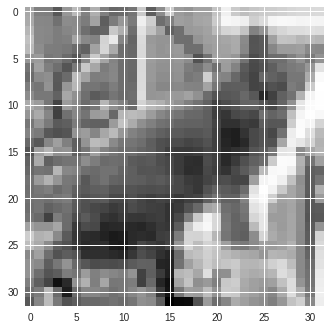

Image 50 : Class is  deer


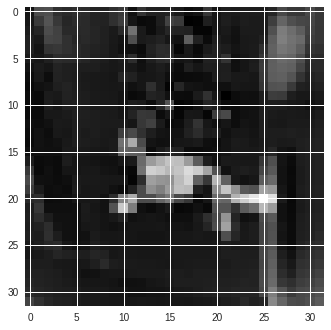

Image 51 : Class is  deer


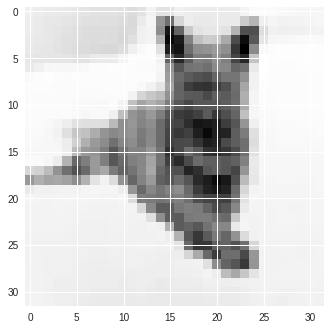

Image 52 : Class is  cat


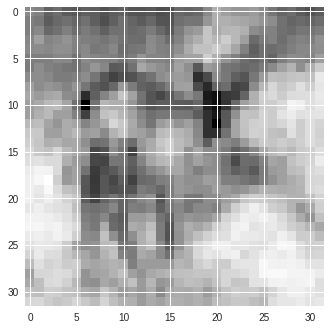

Image 53 : Class is  cat


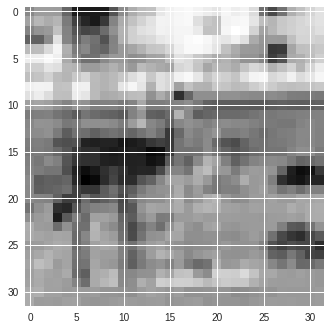

Image 54 : Class is  cat


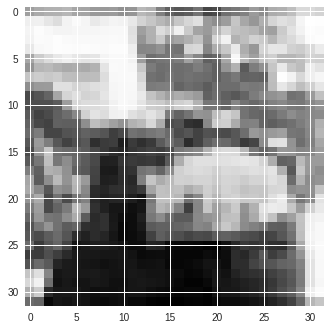

Image 55 : Class is  cat


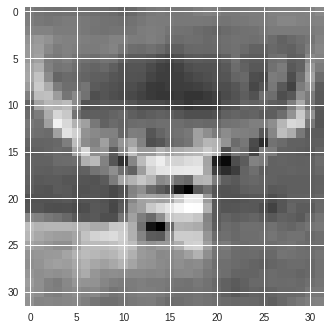

Image 56 : Class is  deer


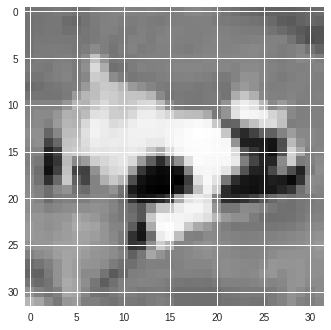

Image 57 : Class is  deer


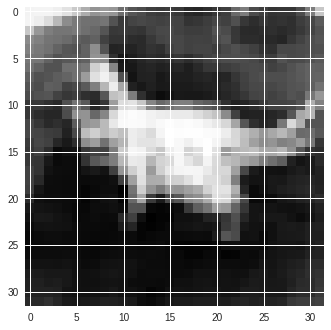

Image 58 : Class is  cat


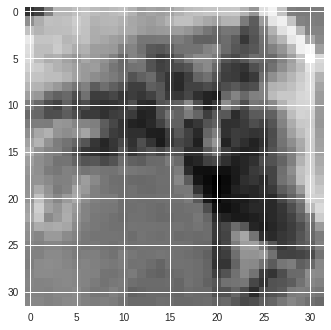

Image 59 : Class is  cat


In [0]:
# Display a few images in grayscale
for i in range (50,60):
  visualise(X_test[:, i])
  print("Image", i,": Class is ", labels_dict[y_predict[0, i]])

## Deep Neural Network

### Deep Neural Network Using Auto Encoder

Performance of the Image classification can be improved by using Deep Neural Networks (multplie hidden layers). Deep Neural Network can be implemented like above using forward propogation and back propogation through multiple layers. Another approach for building Deep Neural Network is by using auto-encoders.

Auto-Encoders are One layer Neural Network with same number of input and output features. The hidden layer usually consists of fewer cells compared to input/output layers. Once the auto-encoder is trained, it acts as compression/decompression i.e. the model learns to represent the input using the hidden units and the hidden units are used to get the input back. 

Multiple auto-encoders can be used to form a deep neural network. This can be used to predict the class of the image.

In the below implementation, size of hidden layers is passed as a python list. An Auto-Encoder is trained for each hidden layer except the last one. Every time, the hidden activations from layer L is send as input to auto encoder of layer L+1. Finally for the last layer a Shall Neural Network is trained to predict the output. 

In [0]:
def DeepNNUsingAutoEncoder(X, y, hidden_layers, activation_func, num_epochs, learning_rates):
  
  L = len(hidden_layers)
  all_weights = dict()
  input_autoencoder = X
  
# Multiple layers of Auto Encoders 
  
  for i in range(L-1):
    
    print("Training Auto Encoder {}...".format(i+1))
    
    all_weights[i+1] = NNWithOneHiddenLayer(input_autoencoder,
                                              input_autoencoder,
                                              hidden_layers[i],
                                              activation_func=activation_func,
                                              num_epochs=num_epochs,
                                              learning_rate=learning_rates[i])
    
    activations_autoencoder = feed_forward(input_autoencoder, 
                                           all_weights[i+1], 
                                           activation_func)
    
    input_autoencoder = activations_autoencoder['A1']

# Last layer of the Neural Network is a Shall Neural Network    
    
  print("Training Shallow NN")
  all_weights[L] = NNWithOneHiddenLayer(input_autoencoder,
                                          y,
                                          hidden_layers[L-1],
                                          activation_func=activation_func,
                                          num_epochs=num_epochs,
                                          learning_rate=learning_rates[L-1])
  
  return all_weights

Using the above framework, a two layer Neural Network is trained to predict the labels of the images. 

The first layer of this Deep Neural Network is formed by training an auto encoder using the CIFAR images training data (X_train) as input and output. `NNWithOneHiddenLayer` is used to train the auto encoder with same input and output datasets and below hyperparameters



*   Hidden layer size = 500
*   Activation funtion = tanh
* number of epochs = 10000
* learning rate = 0.001

A shallow Neural Network is then trained using the hidden layer as input to this network and using the labels as output. The hyperparameters for this Neural Network is as below

*   Hidden layer size = 100
*   Activation funtion = tanh
* number of epochs = 15000
* learning rate = 0.05


*Note: Because of huge number of parameters, the model is taking about 20 to 25 min to complete training *


In [0]:
deep_hidden_layers = [500, 100]
activation_func = 'tanh'
num_epochs = 15000
learning_rates = [0.001, 0.05]

deepWeights = DeepNNUsingAutoEncoder(X_train, 
                                     y_train, 
                                     deep_hidden_layers, 
                                     activation_func, 
                                     num_epochs, 
                                     learning_rates)

Training Auto Encoder 1...
Cost after 0 iterations is 709.9602743159431
Cost after 1000 iterations is 663.7577787794605
Cost after 2000 iterations is 646.4995137774758
Cost after 3000 iterations is 631.3350546820752
Cost after 4000 iterations is 621.3226030845802
Cost after 5000 iterations is 618.7922679256947
Cost after 6000 iterations is 614.3784922490321
Cost after 7000 iterations is 611.5743986480152
Cost after 8000 iterations is 609.3618189064194
Cost after 9000 iterations is 607.5330926336661
Cost after 10000 iterations is 605.9828446667941
Cost after 11000 iterations is 604.6417707071718
Cost after 12000 iterations is 603.4648224552236
Cost after 13000 iterations is 602.4230494885979
Cost after 14000 iterations is 601.4949159828502
Cost after 14999 iterations is 600.6772253329301
Training Shallow NN
Cost after 0 iterations is 0.693574854806605
Cost after 1000 iterations is 0.4292461131956638
Cost after 2000 iterations is 0.16111970371592865
Cost after 3000 iterations is 0.056756

### Predict

Below predict function take the weights from above trained Deep Neural Network and predicts the output as below



*   Calculate the Activations using Auto-encoder weights for all the auto encoders (i.e. L-1 layers)
*   Using the activations from the last auto-encoder, make predictions for the input images using the weights of last layer L.
* Convert the predictions to class 0 or 1 using a threshold of 0.5.



In [0]:
def predict_autoencoder_NN(X, deepWeights, activation_func):
  
  L = len(deepWeights)
  current_activation = X
  
  for i in range(L):
    activations = feed_forward(current_activation, deepWeights[i+1], activation_func)
    current_activation = activations['A1']
  y_predict = activations['A2'] > 0.5
  return y_predict.astype(int)
  

Accuracy of the improved Deep Neural Network is shown below

In [0]:
y_predict = predict_autoencoder_NN(X_test, deepWeights, activation_func)
accuracy = score(y_test, y_predict)
print("Accuracy : ", accuracy)

Accuracy :  60.8


Observation: Accuracy is varying between 60 to 68 depending on the test train split.

## Deep Neural Network with multiple layers 

To capture more insights and improve the performance of  Image classification can be done by using Deep Neural Networks (multplie hidden layers). Deep Neural Network can be implemented in the same way as shallow network except that it consists of L layer forward propogation and back propogation through multiple layers. 

### Initialise Weights

For a deep Neural Network, there will be a $l$ sets of weight matrices and bias vectors.

The weight matrices are initiaised using random function of numpy and to make the weights smaller, 0.01 is multiplied. Bais vectors are initialised with zeros. Python uses broadcasting to expand the bias vectors to match the dimensions of corresponsding weight vectors. 

**Dimensions:**

**WL** : $(n^{[L]}, n^{[L-1]})$

**bL** : $(n^{[L]}, 1)$

Where $n^{[l]}$ indicates the  number of cells in layer $l$




In [0]:
def dnn_initialize_weights(layer_dims):
    weights = dict()
    L = len(layer_dims)  # number of layers in the network

    for l in range(1, L):
        weights["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        weights["b" + str(l)] = np.zeros((layer_dims[l], 1))

    return weights
  

### Deep Forward Propagation

In forward propogation, the acivations are calculated by using the input features and weights corresponding to input and hidden layer (W1 and b1). Each layer activations are calculated by calculating the linear function (Z) and applying the activation fuction(relu/sigmoid) to the output of the linear function.

for all the previous layers we are using 'relu' as activation function. and in the last output layer, sigmoid activation function is used as we are implementing a binary classifier.

**Activatios of Hidden layer:**

$Z_{l} = W_{l}.A_{l-1} + b_{l}$

$A_{l} = g(Z_{l})$ (relu,sigmoid or tanh activation function can be used here)

Here i am using $relu$ activation function


$Z_{L} = W_{L}.A_{L-1} + b_{L}$

$A_{L} = sigmoid(Z_{L})$


where $L$ is the Last layer


In [0]:
def dnn_activation_function(Z, ftype='sigmoid'):
  
  if ftype == 'sigmoid':
    return 1 / (1 + np.exp(-1 * Z))
  elif ftype == 'tanh':
    return np.tanh(Z)
  elif ftype == 'relu':
    return np.maximum(0, Z)
  else:
    raise Exception('Invalid activation function') 

def dnn_activation_forward(A_prev, W, b, activation_func):
    
    Z = np.dot(W, A_prev) + b
    A = dnn_activation_function(Z, activation_func)
    cache = (A_prev, W, b, Z)
    return A, cache
  
def dnn_L_Layer_forward(X, weights):
    caches = []
    A = X
    # number of layers in the neural network (length/2 because weights has both W and b)
    L = len(weights) // 2  

    for l in range(1, L):
        A_prev = A
        A, cache = dnn_activation_forward(A_prev, weights["W" + str(l)], weights["b" + str(l)], "relu")
        caches.append(cache)
    AL, cache = dnn_activation_forward(A, weights["W" + str(L)], weights["b" + str(L)], "sigmoid")
    caches.append(cache)
    return AL, caches


### Compute Cost

Cost of the classifier can be calculated as below

$J = \frac{-1}{m}\displaystyle\sum_{i=1}^{m}(y^{(i)}log(AL+ \epsilon) + (1-y^{(i)})log(1 -AL+\epsilon)$

I have added a small $\epsilon$  value to avoid $log0$.

In [0]:
def compute_cost_with_epsilon(AL, y):
    epsilon = 1e-6
    m = y.shape[1]
    cost = (-1/m) * np.sum(np.multiply(y, np.log(AL+epsilon)) + np.multiply(1 - y, np.log(1 - AL+epsilon)))
    return cost

### Deep Backpropogation

In back propogation, we calculate the gradients of the loss function with respect to the weights and bias parameters.
Back propogation can be implemented using the below equations.



For layer $l$, 

$Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$

$dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. 
 
Computed the  $(dW^{[l]}, db^{[l]} dA^{[l-1]})$ from $dZ^{[l]}$ by using the below formulae


$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$


In [0]:
def dnn_activation_backward(dA, Z, activation_func):
    if activation_func == 'relu':
        dZ = np.array(dA, copy=True)  
        dZ[Z <= 0] = 0    
    elif activation_func == 'sigmoid':
        S = dnn_activation_function(Z, activation_func)
        dZ = dA * S * (1 - S)
        
    return dZ

def dnn_back_propogation(dZ, A_prev, W, b):
    # finding the gradients of dW and db by accessing the values from cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims= True)
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db


def dnn_linear_activation_backward(dA, cache, activation_func):
  
    A_prev, W, b, Z = cache

    dZ = dnn_activation_backward(dA, Z, activation_func)
    dA_prev, dW, db = dnn_back_propogation(dZ, A_prev, W, b)
    return dA_prev, dW, db
  

def dnn_L_Layer_backward(AL, Y, caches):
    grads = dict()
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    # Initializing the backpropagation
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[-1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = dnn_linear_activation_backward(dAL,current_cache,'sigmoid')
   
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        grads["dA" + str(l)], grads["dW" + str(l + 1)], grads["db" + str(l + 1)] = dnn_linear_activation_backward(grads["dA" + str(l + 1)], current_cache, 'relu')

    return grads


### Update Weights

Once the gradients are calculated, below function updates the weights using learning rate and gradients of weights

In [0]:
def dnn_update_weights(weights, grads, learning_rate):
    L = len(weights) // 2 
    for l in range(L):
        weights["W" + str(l + 1)] = weights["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        weights["b" + str(l + 1)] = weights["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return weights

### L Layer Deep Neural Network Model

Using the functions created above, a deep Neural Network with $L$ layer can be created as below


1.   Initialise the weights of the deep Neural Network using the number of input features, hidden layer dimensionalities and ouput layer size. As we are implementing a binary classification Neural Network, an output layer of size 1 is used.
2.   Activations of each layer is calculated using the input data and weights. A default activation function of relu is used to calculate the activations of hidden layers. and for the last layer using the sigmoid activation function. we can change this to any activation function.

3. Cost is computed using the activations of output layer (`AL`) and the actual output Y.

4. Compute the gradients using back propogation

5. Update the weights using the gradients 

6. Run steps 2-5 multiple times (number of epochs) to train the deep neural network.



In [0]:
def dnn_L_Layer(X, Y, layers_dims, learning_rate=0.0075, num_iterations=1000): 

    weights = dnn_initialize_weights(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = dnn_L_Layer_forward(X, weights)
        cost = compute_cost_with_epsilon(Y, AL)
        grads = dnn_L_Layer_backward(AL, Y, caches)
        weights = dnn_update_weights(weights, grads, learning_rate)
        if i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            
    print ("Cost after iteration %i: %f" % (i, cost))

    return weights 
    
  

## Training the Model 

In [0]:
layer_dims =[1024,100,50,1]

dnn_weights = dnn_L_Layer(X_train, 
                        y_train, 
                        layer_dims, 
                        learning_rate=0.02,
                        num_iterations = 10000)

Cost after iteration 0: 6.907754
Cost after iteration 1000: 6.906100
Cost after iteration 2000: 6.904553
Cost after iteration 3000: 6.887762
Cost after iteration 4000: 6.271271
Cost after iteration 5000: 4.242412
Cost after iteration 6000: 2.315383
Cost after iteration 7000: 0.641872
Cost after iteration 8000: 0.166891
Cost after iteration 9000: 0.077975
Cost after iteration 9999: 0.047277


## Predict


Below functions makes the predictions using the L_Layer_ forward function with test data. A threshold of 0.5 is used to predict the actual output i.e. if the output of the Neural Network is greater than 0.5, a prediction of 1 is made and if the output is less than 0.5, a pediction of 0 is made.


In [0]:
def dnn_predict(X, weights):
    AL,_= dnn_L_Layer_forward(X_test, weights)
    y_predict =  AL > 0.5
    return y_predict.astype(int)

Below code makes the predictions using test dataset and calculates the accuracy

In [0]:
y_predict = dnn_predict(X_test, dnn_weights)
accuracy = score(y_test, y_predict)
print("Accuracy : ", accuracy)

Accuracy :  60.8


### Observation

By implementing the deep neural networks , the accuracy for the image classification has increased significantly.

## References

1. Andrew N.G Deep learning Course (Neural Networks and Deep Learning)
2. Auto Encoder : Class lecture Slides
3. Plot decision boundary : https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

